In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b16da0dd-aab1-4984-8f97-63f4de33b8f7',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-05-19T14:13:08.950Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 9717}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10220, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10220,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937794e+07,1.937794e+07,False,NaN,1,NaN,NaN,None,2023-05-19T14:11:00.000Z,26806.985788,1.381390e+10,-2.3532,-0.450744,-1.766375,1.431858,-8.912158,-4.128034,9.126282,5.194641e+11,46.2313,5.629467e+11,None,2023-05-19T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 14:13:11.593050+00:00
1,1027,Ethereum,ETH,ethereum,6915,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202757e+08,1.202757e+08,True,NaN,2,NaN,NaN,None,2023-05-19T14:11:00.000Z,1809.726892,5.587107e+09,3.1596,-0.325898,-0.517773,2.121685,-9.234395,2.403202,6.777753,2.176661e+11,19.3740,2.176661e+11,None,2023-05-19T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 14:13:11.593050+00:00
2,825,Tether,USDT,tether,53738,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.285692e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-19T14:11:00.000Z,1.000253,2.058216e+10,-7.1812,0.015133,0.027420,-0.031673,-0.021511,-0.190874,0.000441,8.287785e+10,7.3768,8.611238e+10,None,2023-05-19T14:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-19 14:13:11.593050+00:00
3,1839,BNB,BNB,bnb,1379,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558588e+08,1.558588e+08,False,NaN,4,NaN,NaN,None,2023-05-19T14:11:00.000Z,309.343408,3.619217e+08,-8.2857,-0.143722,-1.203809,1.052346,-5.885627,-8.268384,-2.298333,4.821389e+10,4.2920,4.821389e+10,None,2023-05-19T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 14:13:11.593050+00:00
4,3408,USD Coin,USDC,usd-coin,12545,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.960959e+10,2.960959e+10,False,NaN,5,NaN,NaN,None,2023-05-19T14:11:00.000Z,1.000124,2.747559e+09,-8.6399,0.006312,0.017153,0.002595,0.003804,0.093978,0.018285,2.961326e+10,2.6355,2.961326e+10,None,2023-05-19T14:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-19 14:13:11.593050+00:00
5,52,XRP,XRP,xrp,950,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-19T14:11:00.000Z,0.463143,1.086974e+09,-13.1203,-0.377625,-0.298418,8.088937,-7.121633,21.500222,17.436079,2.400832e+10,2.1369,4.631428e+10,None,2023-05-19T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 14:13:11.593050+00:00
6,2010,Cardano,ADA,cardano,789,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485846e+10,3.579395e+10,False,NaN,7,NaN,NaN,None,2023-05-19T14:11:00.000Z,0.369031,1.667727e+08,-22.1543,-0.364248,-2.081404,1.495938,-12.882703,8.196669,-8.020397,1.286384e+10,1.1450,1.660637e+10,None,2023-05-19T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 14:13:11.593050+00:00
7,74,Dogecoin,DOGE,dogecoin,710,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.394107e+11,1.394107e+11,True,NaN,8,NaN,NaN,None,2023-05-19T14:11:00.000Z,0.073326,2.578028e+08,-14.9820,-0.391513,-1.124367,2.408112,-19.311022,-0.435629,-16.238177,1.022249e+10,0.9098,1.022249e+10,None,2023-05-19T14:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 14:13:11.593050+00:00
8,5426,Solana,SOL,solana,463,2020-04-10T00:00:00.000Z,"[pos, platform,

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b16da0dd-aab1-4984-8f97-63f4de33b8f7',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now',utc=True)
    df
    
    if not os.path.isfile(r'C:\Users\talha\Desktop\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\talha\Desktop\Python Scripts\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\talha\Desktop\Python Scripts\API.csv',mode='a',header=False)

In [5]:
import os
from time import time
from time import sleep

for i in range(100):
    api_runner()
    print('API run complete')
    sleep(15)
exit()

API run complete
API run complete
API run complete


KeyboardInterrupt: 

In [7]:
df3= pd.read_csv(r'C:\Users\talha\Desktop\Python Scripts\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10219,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.937788e+07,1.937788e+07,False,NaN,1,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,26937.283294,1.421755e+10,0.8713,0.362417,-1.264339,1.874845,-7.866479,-4.778421,9.581022,5.219873e+11,46.3215,5.656829e+11,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
1,1,1027,Ethereum,ETH,ethereum,6915,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202757e+08,1.202757e+08,True,NaN,2,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,1815.961177,5.660955e+09,3.3572,0.494263,-0.203009,2.383620,-8.205970,1.732725,7.111812,2.184160e+11,19.3867,2.184160e+11,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
2,2,825,Tether,USDT,tether,53734,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.285692e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,1.000196,2.105982e+10,-5.2671,0.003453,0.028708,-0.021699,-0.002959,-0.329523,-0.002911,8.287318e+10,7.3559,8.610753e+10,NaN,2023-05-19T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-19 12:44:58.641407+00:00
3,3,1839,BNB,BNB,bnb,1379,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558588e+08,1.558588e+08,False,NaN,4,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,309.978575,3.674922e+08,-7.2976,0.284022,-1.057856,1.132644,-4.931122,-8.671076,-1.864877,4.831290e+10,4.2886,4.831290e+10,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
4,4,3408,USD Coin,USDC,usd-coin,12545,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.957873e+10,2.957873e+10,False,NaN,5,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,1.000034,2.804695e+09,-7.4217,0.002270,0.018464,0.021460,0.009272,0.021200,-0.002762,2.957975e+10,2.6249,2.957975e+10,NaN,2023-05-19T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-19 12:44:58.641407+00:00
5,5,52,XRP,XRP,xrp,950,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,0.464897,1.159448e+09,-4.8837,0.173824,-0.517293,8.340413,-6.457680,21.143308,18.107881,2.409925e+10,2.1391,4.648970e+10,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
6,6,2010,Cardano,ADA,cardano,789,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.485937e+10,3.579395e+10,False,NaN,7,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,0.370549,1.729534e+08,-19.1684,0.435314,-1.751754,1.061005,-11.560660,7.641034,-7.430549,1.291712e+10,1.1465,1.667472e+10,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
7,7,74,Dogecoin,DOGE,dogecoin,710,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.394095e+11,1.394095e+11,True,NaN,8,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,0.073664,2.675058e+08,-12.1137,0.344862,-0.668548,2.418611,-16.552575,-0.473245,-15.749347,1.026948e+10,0.9113,1.026948e+10,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
8,8,5426,Solana,SOL,solana,463,2020-04-10T00:00:00.000Z,"['pos', 

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10219,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19377875.00000,19377875.00000,False,NaN,1,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,26937.28329,14217545989.78537,0.87130,0.36242,-1.26434,1.87485,-7.86648,-4.77842,9.58102,521987308501.36768,46.32150,565682949163.85999,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
1,1,1027,Ethereum,ETH,ethereum,6915,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120275672.45154,120275672.45154,True,NaN,2,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,1815.96118,5660955026.87605,3.35720,0.49426,-0.20301,2.38362,-8.20597,1.73272,7.11181,218415951729.04288,19.38670,218415951729.04001,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
2,2,825,Tether,USDT,tether,53734,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82856924178.67105,86090638895.06883,True,NaN,3,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,1.00020,21059821678.07555,-5.26710,0.00345,0.02871,-0.02170,-0.00296,-0.32952,-0.00291,82873178603.21783,7.35590,86107527692.33000,NaN,2023-05-19T12:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-19 12:44:58.641407+00:00
3,3,1839,BNB,BNB,bnb,1379,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155858824.60061,155858824.60061,False,NaN,4,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,309.97857,367492228.90471,-7.29760,0.28402,-1.05786,1.13264,-4.93112,-8.67108,-1.86488,48312896333.46638,4.28860,48312896333.47000,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
4,4,3408,USD Coin,USDC,usd-coin,12545,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,29578731693.58225,29578731693.58225,False,NaN,5,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,1.00003,2804695226.40193,-7.42170,0.00227,0.01846,0.02146,0.00927,0.02120,-0.00276,29579748765.40821,2.62490,29579748765.41000,NaN,2023-05-19T12:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-19 12:44:58.641407+00:00
5,5,52,XRP,XRP,xrp,950,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,0.46490,1159448045.32427,-4.88370,0.17382,-0.51729,8.34041,-6.45768,21.14331,18.10788,24099247562.79081,2.13910,46489700624.02000,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
6,6,2010,Cardano,ADA,cardano,789,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34859369379.39100,35793946862.56700,False,NaN,7,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,0.37055,172953433.15953,-19.16840,0.43531,-1.75175,1.06100,-11.56066,7.64103,-7.43055,12917116932.60575,1.14650,16674721095.53000,NaN,2023-05-19T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-19 12:44:58.641407+00:00
7,7,74,Dogecoin,DOGE,dogecoin,710,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139409516383.70526,139409516383.70526,True,NaN,8,NaN,NaN,NaN,2023-05-19T12:43:00.000Z,0.07366,267505827.74250,-12.11370,0.34486,-0.66855,2.41861,-16.55257,-0.47324,-15.74935,10269477000.92537,0.91130,1

In [9]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.45074,-1.76638,1.43186,-8.91216,-4.12803,9.12628
Ethereum,-0.32590,-0.51777,2.12168,-9.23440,2.40320,6.77775
Tether,0.01513,0.02742,-0.03167,-0.02151,-0.19087,0.00044
BNB,-0.14372,-1.20381,1.05235,-5.88563,-8.26838,-2.29833
USD Coin,0.00631,0.01715,0.00260,0.00380,0.09398,0.01828
XRP,-0.37763,-0.29842,8.08894,-7.12163,21.50022,17.43608
Cardano,-0.36425,-2.08140,1.49594,-12.88270,8.19667,-8.02040
Dogecoin,-0.39151,-1.12437,2.40811,-19.31102,-0.43563,-16.23818
Solana,-0.58187,-1.20175,0.06010,-12.91957,-13.45658,-12.33925


In [11]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.45074
             quote.USD.percent_change_24h    -1.76638
             quote.USD.percent_change_7d      1.43186
             quote.USD.percent_change_30d    -8.91216
             quote.USD.percent_change_60d    -4.12803
             quote.USD.percent_change_90d     9.12628
Ethereum     quote.USD.percent_change_1h     -0.32590
             quote.USD.percent_change_24h    -0.51777
             quote.USD.percent_change_7d      2.12168
             quote.USD.percent_change_30d    -9.23440
             quote.USD.percent_change_60d     2.40320
             quote.USD.percent_change_90d     6.77775
Tether       quote.USD.percent_change_1h      0.01513
             quote.USD.percent_change_24h     0.02742
             quote.USD.percent_change_7d     -0.03167
             quote.USD.percent_change_30d    -0.02151
             quote.USD.percent_change_60d    -0.19087
             quote.USD.percent_change_90

In [12]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.45074
            quote.USD.percent_change_24h  -1.76638
            quote.USD.percent_change_7d    1.43186
            quote.USD.percent_change_30d  -8.91216
            quote.USD.percent_change_60d  -4.12803
            quote.USD.percent_change_90d   9.12628
Ethereum    quote.USD.percent_change_1h   -0.32590
            quote.USD.percent_change_24h  -0.51777
            quote.USD.percent_change_7d    2.12168
            quote.USD.percent_change_30d  -9.23440
            quote.USD.percent_change_60d   2.40320
            quote.USD.percent_change_90d   6.77775
Tether      quote.USD.percent_change_1h    0.01513
            quote.USD.percent_change_24h   0.02742
            quote.USD.percent_change_7d   -0.03167
            quote.USD.percent_change_30d  -0.02151
            quote.USD.percent_change_60d  -0.19087
            quote.USD.percent_change_90d   0.00044
BNB         quote.USD.percent_change_1h   -0.14372
            quote.USD.percent_change_24h  -1.20381
            quote.USD.percent_change_7d    1.05235
            quote.USD.percent_change_30d  -5.88563
            quote.USD.percent_change_60d  -8.26838
            quote.USD.percent_change_90d  -2.29833
USD Coin    quote.USD.percent_change_1h    0.00631
            quote.USD.percent_change_24h   0.01715
            quote.USD.percent_change_7d    0.00260
            quote.USD.percent_change_30d   0.00380
            quote.USD.percent_change_60d   0.09398
            quote.USD.percent_change_90d   0.01828
XRP         quote.USD.percent_change_1h   -0.37763
            quote.USD.percent_change_24h  -0.29842
            quote.USD.percent_change_7d    8.08894
            quote.USD.percent_change_30d  -7.12163
            quote.USD.percent_change_60d  21.50022
            quote.USD.percent_change_90d  17.43608
Cardano     quote.USD.percent_change_1h   -0.36425
            quote.USD.percent_change_24h  -2.08140
            quote.USD.percent_change_7d    1.49594
            quote.USD.percent_change_30d -12.88270
            quote.USD.percent_change_60d   8.19667
            quote.USD.percent_change_90d  -8.02040
Dogecoin    quote.USD.percent_change_1h   -0.39151
            quote.USD.percent_change_24h  -1.12437
            quote.USD.percent_change_7d    2.40811
            quote.USD.percent_change_30d -19.31102
            quote.USD.percent_change_60d  -0.43563
            quote.USD.percent_change_90d -16.23818
Solana      quote.USD.percent_change_1h   -0.58187
            quote.USD.percent_change_24h  -1.20175
            quote.USD.percent_change_7d    0.06010
            quote.USD.percent_change_30d -12.91957
            quote.USD.percent_change_60d -13.45658
            quote.USD.percent_change_90d -12.33925
Polygon     quote.USD.percent_change_1h   -0.61465
            quote.USD.percent_change_24h  -0.26099
            quote.USD.percent_change_7d    2.35765
            quote.USD.percent_change_30d -22.59497
            quote.USD.percent_change_60d -24.05406
            quote.USD.percent_change_90d -43.06293
Litecoin    quote.USD.percent_change_1h   -0.45363
            quote.USD.percent_change_24h  -0.96539
            quote.USD.percent_change_7d   15.55800
            quote.USD.percent_change_30d  -4.56703
            quote.USD.percent_change_60d  11.22452
            quote.USD.percent_change_90d  -8.61083
TRON        quote.USD.percent_change_1h    0.02269
            quote.USD.percent_change_24h  -0.27087
            quote.USD.percent_change_7d    2.75358
            quote.USD.percent_change_30d   7.08507
            quote.USD.percent_change_60d   6.24266
            quote.USD.percent_change_90d  -0.04561
Polkadot    quote.USD.percent_change_1h   -0.29084
            quote.USD.percent_change_24h  -1.23231
            quote.USD.percent_change_7d    1.71568
            quote.USD.percent_change_30d -18.01281
            quote.USD.percent_change_60d -16.56335
            quo

In [13]:
import re

a=df5.count()
type(a)
a=a.to_string()
a=re.findall(r'\d+', a)
a=int(a[0])

a

90

In [14]:
index = pd.Index(range(a))
df6 = df5.reset_index() # reset after set?
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45074
1,Bitcoin,quote.USD.percent_change_24h,-1.76638
2,Bitcoin,quote.USD.percent_change_7d,1.43186
3,Bitcoin,quote.USD.percent_change_30d,-8.91216
4,Bitcoin,quote.USD.percent_change_60d,-4.12803
5,Bitcoin,quote.USD.percent_change_90d,9.12628
6,Ethereum,quote.USD.percent_change_1h,-0.32590
7,Ethereum,quote.USD.percent_change_24h,-0.51777
8,Ethereum,quote.USD.percent_change_7d,2.12168
9,Ethereum,quote.USD.percent_change_30d,-9.23440


In [15]:
df7=df6.rename(columns={'level_1':'percent change'})
df7

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45074
1,Bitcoin,quote.USD.percent_change_24h,-1.76638
2,Bitcoin,quote.USD.percent_change_7d,1.43186
3,Bitcoin,quote.USD.percent_change_30d,-8.91216
4,Bitcoin,quote.USD.percent_change_60d,-4.12803
5,Bitcoin,quote.USD.percent_change_90d,9.12628
6,Ethereum,quote.USD.percent_change_1h,-0.32590
7,Ethereum,quote.USD.percent_change_24h,-0.51777
8,Ethereum,quote.USD.percent_change_7d,2.12168
9,Ethereum,quote.USD.percent_change_30d,-9.23440


In [16]:
df7['percent change']=df7['percent change'].replace(['quote.USD.percent_change_1h'],['1Hr'])
df7['percent change']=df7['percent change'].replace(['quote.USD.percent_change_24h'],['24Hr'])
df7['percent change']=df7['percent change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percent change']=df7['percent change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percent change']=df7['percent change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percent change']=df7['percent change'].replace(['quote.USD.percent_change_90d'],['90d'])
df7

,name,percent change,values
0,Bitcoin,1Hr,-0.45074
1,Bitcoin,24Hr,-1.76638
2,Bitcoin,7d,1.43186
3,Bitcoin,30d,-8.91216
4,Bitcoin,60d,-4.12803
5,Bitcoin,90d,9.12628
6,Ethereum,1Hr,-0.32590
7,Ethereum,24Hr,-0.51777
8,Ethereum,7d,2.12168
9,Ethereum,30d,-9.23440


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


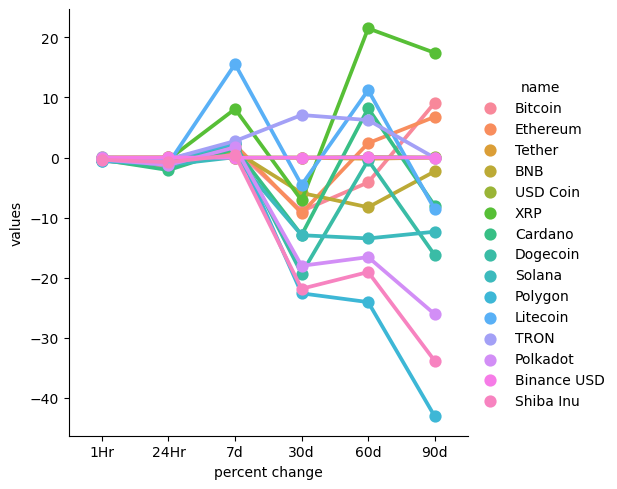

In [19]:
sns.catplot(x='percent change', y = 'values', data=df7,kind = 'point', hue='name')

In [20]:
df8=df[['name','quote.USD.price','timestamp']]
df8= df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,26806.98579,2023-05-19 14:13:43.736503+00:00
